# Overview

In this week's class, we learned how to account for the hemodynamic response function in brain responses. We learned how to use the `neurods.fmri.hrf()` function. In this lab, we will continue to use this function on different examples.


In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

import neurods

# New defaults!
from cycler import cycler
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.prop_cycle'] = cycler('color', ['k','r', (0,0,0.8),(0.95,0.8,0),(0,.8,0),(1.0, 0.5, 0)])

In [3]:
%matplotlib inline
# %config InlineBackend.figure_format = 'retina' # prettier plots for retina screens (optional)

In [4]:
# Plotting function from Lecture08 that we will continue to use
def stim_resp_plot(t, stimulus, response, yl=(-0.2, 1.2), label_stim='Stimulus', label_resp='BOLD response (HRF)'):
    """Plot stimulus and response."""
    plt.figure(figsize=(10,4))
    plt.stem(t, stimulus, linefmt='k-', markerfmt='.', basefmt='k-', label=label_stim)
    plt.plot(t, response, 'r.-', label=label_resp)
    plt.ylim(yl)
    plt.xlim([-1,t.max()+1])
    plt.xlabel('Time (seconds)')
    plt.ylabel('Response (arbitrary units)')
    _ = plt.legend()

### 1. [2 pts.] Describe in words what the following  `gen_responses()` function does ?

In [5]:
def gen_responses(stimulus_vec, hrf_canonical):
    n = stimulus_vec.shape[0]
    hrf_length = len(hrf_canonical)
    response = np.zeros((n,))
    for i in range(n):
        if stimulus_vec[i]==1:
            index = range(i, min(i+hrf_length, n))
            response[index] += hrf_canonical[:len(index)]
    return response

##### Student Answer
Write your answer here

1) The function takes inputs ...

2) The function returns ...

3) To compute the output the function does ...

### 2.  [2 pts.] Using `gen_responses()`

Now, imagine you have a 200 TR long stimulus. Given that you have an event in time points ([10, 21, 25, 70, 75, 80, 150]), generate responses and plot the stimulus and its response. The steps you need to write are:

1) Generate an HRF with TR=1 (use the `neurods.fmri.hrf()` function)

2) Generate the stimulus

3) Generate responses for this stimulus

4) Plot stimulus, response using the `stim_respo_plot()` function from the lecture.

HINT: This should be very similar to what we already did in the class. The only difference is that you should use the `gen_responses()` function.

In [ ]:
### STUDENT ANSWER
import neurods
t_hrf, hrf_1 = neurods.fmri.hrf(tr=1)
hrf_length = len(hrf_1)
n = 200
t = np.arange(n,)
stimuli = np.zeros((n))

stim_times = [10, 21, 25, 70, 75, 80, 150]
for i in stim_times:
    stimuli[i] = 1

response = gen_responses(stimuli,hrf_1)
stim_resp_plot(t, stimuli, response, yl=(-0.2, 1.2))

### 3. [2 pts.] Events with different intensities

Until now, all the events had the same intensity (we set them in this lab and in the class to 1). Now, assume that the events occur with different intensities: for example, this could be caused by a tactile stimulus that had different levels of intensities. 

In this question, compute the measured response to each event by assuming that the response is proportional to the intensity of the event.  

In [ ]:
import neurods
t_hrf, hrf_1 = neurods.fmri.hrf(tr=1)
hrf_length = len(hrf_1)
n = 200
t = np.arange(n,)
stimuli = np.zeros((n))

# Generate stimulus with different intensities
stim_times = [10, 21, 25, 70, 75, 80, 150]
stim_intensities = [0.25, 0.25, 1, 1, 1, 0.5, 0.5]
for idx, i_time in enumerate(stim_times):
    stimuli[i_time] = stim_intensities[idx]

plt.figure(figsize=(10,4))
plt.xlabel('Time (seconds)')
plt.ylabel('Response (arbitrary units)')
plt.stem(t, stimuli)

**Modify the function `gen_responses` to adjust for this change in intensity for each event:**

Here we provide you with the first part of the function and you can start modifying the function where the STUDENT ANSWER marker is (inside the for loop).

In [ ]:
def gen_responses(stimulus_vec, hrf_canonical):
    n = stimulus_vec.shape[0]
    hrf_length = len(hrf_canonical)
    response = np.zeros((n,))
    for i in range(n):
### STUDENT ANSWER
        index = range(i, min(i+hrf_length,n) )
        response[index] +=  stimuli[i]*hrf_canonical[:len(index)]
    return response

**Plot stimulus and response**

In [ ]:
### STUDENT ANSWER
response = gen_responses(stimuli,hrf_1)
stim_resp_plot(t, stimuli, response, yl=(-0.2, 1.2))

### 4. [2 pts.] Blocked stimulus

In this question, we will create a _blocked_ stimulus, i.e. the simulus is on (you can set all events within one block to one) for 30 seconds, starting at 10, 70 and 130 seconds. Then, we will compute the measured response to each blocked stimulus, and plot the stimulus and response:

1) Generate an HRF with TR=1 (use the neurods.fmri.hrf() function)

2) Generate the blocked_stimulus that is on for 30 seconds, starting at 10, 70, and 130 seconds.

3) Generate responses for this stimulus (Use `gen_responses()`)

4) Plot stimulus, response using the stim_respo_plot() function from the lecture.

In [ ]:
### STUDENT ANSWER
t_hrf, hrf_1 = neurods.fmri.hrf(tr=1)
hrf_length = 32
n = 200
t = np.arange(n,)
stimuli = np.zeros((n))

stim_times = list(range(10, 40)) + list(range(70, 100))+ list(range(130, 160))
for i in stim_times:
    stimuli[i] = 1

plt.figure(figsize=(10,4))
plt.xlabel('Time (seconds)')
plt.ylabel('Response (arbitrary units)')
plt.stem(t, stimuli)

response = gen_responses(stimuli, hrf_1)
stim_resp_plot(t, stimuli, response, yl=(-0.2, 1.2))

### Introducing the `np.convolve()` function

What we did in this week's lecture and in this lab so far is called **convolution**: we have a measured signal and the stimulus. The signal is modified by a function, this is in our case the HRF and we would like to account for this.

Convolution is an operation where you integrate a given signal with a modifying function. What we did so far is a simplified integration: Because our example was in a discrete time domain, we manually added the contributions of the modifying function (the HRF) to each time point after the event onset. By doing this, previous values of the signal (before time i) affect the new transformed signal (at time i).

So, we can simply use the `np.convolve()` numpy function to convolve the event onsets (design matrix) with the HRF.

### 5. [2 pts.] Using `np.convolve()`

Here we will build on question 4 and use the same _blocked_ stimulus, i.e. the simulus is on for 30 seconds, starting at 10, 70 and 130. 

This time use `np.convolve()` to generate responses and plot the stimulus and response. Check the docstring of this function to understand what arguments it takes.

1) Generate an HRF with TR=1 (use the neurods.fmri.hrf() function)

2) Use the blocked_stimulus from the previous question 4

3) Generate responses for this stimulus (Use `np.convolve()`) 

4) Plot stimulus, response using the stim_respo_plot() function from the lecture.
   
   HINT for plotting: Check the "mode" argument to np.convolve() function. What does it do? Is the length of your response the same as the length of your timepoints or stimulus? You may need to specify how many timepoints you take when you plot.

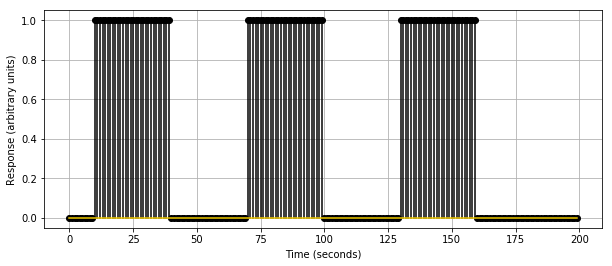

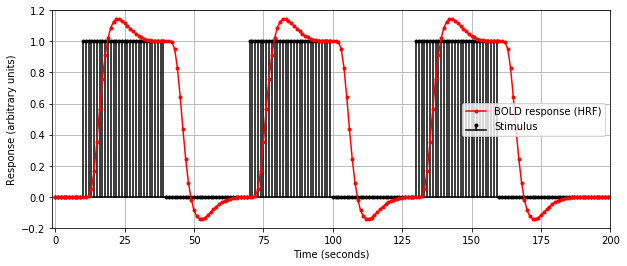

In [6]:
### STUDENT ANSWER
t_hrf, hrf_1 = neurods.fmri.hrf(tr=1)
hrf_length = 32
n = 200
t = np.arange(n,)
stimuli = np.zeros((n))

stim_times = list(range(10, 40)) + list(range(70, 100))+ list(range(130, 160))
for i in stim_times:
    stimuli[i] = 1

plt.figure(figsize=(10,4))
plt.xlabel('Time (seconds)')
plt.ylabel('Response (arbitrary units)')
plt.stem(t, stimuli)

response = np.convolve(stimuli, hrf_1, mode='full')
stim_resp_plot(t, stimuli, response[:n], yl=(-0.2, 1.2))

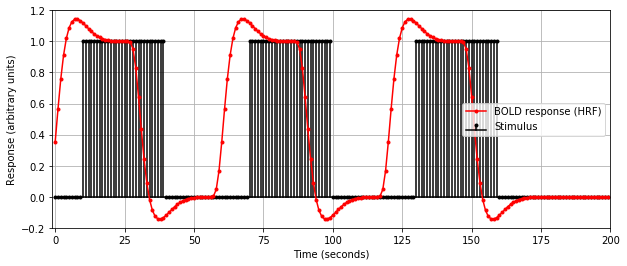

In [7]:
## Many of you used mode='same'.
## However, you should have noticed that the BOLD response is not 'delayed' 
## when you use 'same'
response2 = np.convolve(stimuli, hrf_1, mode='same')
stim_resp_plot(t, stimuli, response2[:n], yl=(-0.2, 1.2))